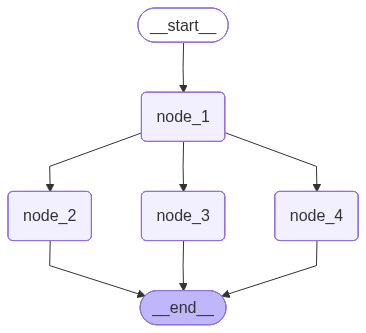

In [7]:
from typing import Literal
class State(TypedDict):
    name: str
    subject: Literal["physics","chemistry","maths"]

def node_1(state):
    print("---Node 1---")
    return {"name": "Aniket"}

def node_2(state):
    print("---Node 2---")
    return {"subject":"physics"}

def node_3(state):
    print("---Node 3---")
    return {"subject":"chemistry"}

builder.add_node("node_3", node_3)
builder.add_node("node_4",node_4)

def node_4(state):
    print("---Node 4---")
    return {"subject":"maths"}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_1","node_4")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"name":"hehe","subject":"physics"})
except InvalidUpdateError as e:
    print(f"InvalidUpdateError occurred: {e}")


---Node 1---
---Node 2---
---Node 3---
---Node 4---
InvalidUpdateError occurred: At key 'subject': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


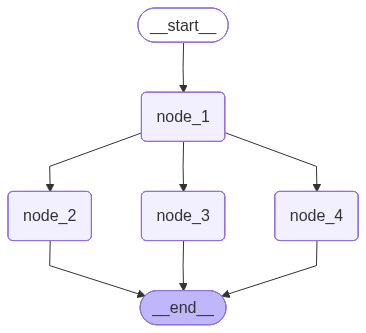

In [19]:
from operator import add
from typing import Annotated

class State(TypedDict):
    name: str
    subject: Annotated[list[str], add]

def node_1(state):
    print("---Node 1---")
    return {"name": "Aniket"}

def node_2(state):
    print("---Node 2---")
    return {"subject":["physics"]
           }

def node_3(state):
    print("---Node 3---")
    return {"subject":["chemistry"]}


def node_4(state):
    print("---Node 4---")
    return {"subject":["maths"]}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4",node_4)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_1","node_4")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))
    

In [22]:
graph.invoke({"name":"hehe","subject":[]})

---Node 1---
---Node 2---
---Node 3---
---Node 4---


{'name': 'Aniket', 'subject': ['physics', 'chemistry', 'maths']}

In [23]:
try:
    graph.invoke({"name":"haha","subject":None})
except TypeError as e:
    print(f"TypeError occurred: {e}")

TypeError occurred: can only concatenate list (not "NoneType") to list


In [24]:
def reduce_list(left: list | None, right: list | None) -> list:
    """Safely combine two lists, handling cases where either or both inputs might be None.

    Args:
        left (list | None): The first list to combine, or None.
        right (list | None): The second list to combine, or None.

    Returns:
        list: A new list containing all elements from both input lists.
               If an input is None, it's treated as an empty list.
    """
    if not left:
        left = []
    if not right:
        right = []
    return left + right

class DefaultState(TypedDict):
    name: str
    subject: Annotated[list[str], add]

class CustomReducerState(TypedDict):
    name:str
    subject: Annotated[list[str], reduce_list]

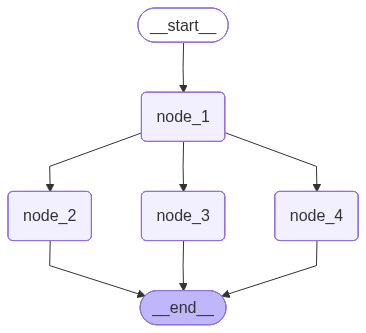

In [25]:
def node_1(state):
    print("---Node 1---")
    return {"name": "Aniket"}

def node_2(state):
    print("---Node 2---")
    return {"subject":["physics"]
           }

def node_3(state):
    print("---Node 3---")
    return {"subject":["chemistry"]}


def node_4(state):
    print("---Node 4---")
    return {"subject":["maths"]}

# Build graph
builder = StateGraph(CustomReducerState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4",node_4)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_1","node_4")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
try:
    graph.invoke({"name":"haha","subject":None})
except TypeError as e:
    print(f"TypeError occurred: {e}")

---Node 1---
---Node 2---
---Node 3---
---Node 4---


In [27]:
from typing import Annotated
from langgraph.graph import MessagesState
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

# Define a custom TypedDict that includes a list of messages with add_messages reducer
class CustomMessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    added_key_1: str
    added_key_2: str
    # etc

# Use MessagesState, which includes the messages key with add_messages reducer
class ExtendedMessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    added_key_1: str
    added_key_2: str

In [28]:
from langgraph.graph.message import add_messages
from langchain_core.messages import AIMessage, HumanMessage

# Initial state
initial_messages = [AIMessage(content="hi , how can i help you", name="ai"),
                    HumanMessage(content="i wanna know if virat kohli will play the 2027 world cup or not.", name="Aniket")
                   ]

# New message to add
new_message = AIMessage(content=" sure , it depends on him and the selectors , ", name="ai")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='hi , how can i help you', additional_kwargs={}, response_metadata={}, name='ai', id='130ad457-a3c8-46f5-ae19-bd1a2ebb5c04'),
 HumanMessage(content='i wanna know if virat kohli will play the 2027 world cup or not.', additional_kwargs={}, response_metadata={}, name='Aniket', id='0c9d0613-e7cf-45aa-bc0c-8e7bbafcea86'),
 AIMessage(content=' sure , it depends on him and the selectors , ', additional_kwargs={}, response_metadata={}, name='ai', id='e906b2c3-cbaf-4e1f-8875-086e3a718521')]

In [29]:
# Initial state
initial_messages = [AIMessage(content="hi , how can i help you", name="ai",id="1"),
                    HumanMessage(content="i wanna know if virat kohli will play the 2027 world cup or not.", name="Aniket",id="2")
                   ]

# New message to add
new_message = AIMessage(content=" sure , it depends on him and the selectors , ", name="ai",id="2")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='hi , how can i help you', additional_kwargs={}, response_metadata={}, name='ai', id='1'),
 AIMessage(content=' sure , it depends on him and the selectors , ', additional_kwargs={}, response_metadata={}, name='ai', id='2')]